In [1]:
# !pip install textstat

In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import f_classif, mutual_info_classif
import nltk
from nltk.tokenize import sent_tokenize
from nltk import word_tokenize, pos_tag
import spacy
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import re
from textblob import TextBlob
# import textstat
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words('english'))

In [5]:
train_df = pd.read_csv("/kaggle/input/xai-updatedataset/train_df (1).csv").sample(2000)
test_df = pd.read_csv("/kaggle/input/xai-updatedataset/test_df (1).csv").sample(700)

In [6]:
# X_train = train_df["text"]
y_train = train_df["label"]
# X_test = test_df["text"]
y_test = test_df["label"]

In [7]:
vectorizer = CountVectorizer(ngram_range=(3, 5))  # Change to TfidfVectorizer() for TF-IDF
X_train = vectorizer.fit_transform(train_df["text"])
X_test = vectorizer.transform(test_df["text"])

In [8]:
# df_test_features = pd.DataFrame()
# df_test_features[feature_columns] = test_df['text'].apply(extract_features).apply(pd.Series)
# X_test = np.hstack((X_test_vec, df_test_features))

In [9]:
# feature_columns = [
#     "punctuation_count",
#     "word_count",
#     "sentence_count",
#     "verb_count",
#     "char_count",
#     "adv_count",
#     "hapax_legomena",
#     "noun_count",
#     "flesch_reading_ease",
#     "personal_pronoun_count",
#     "avg_sentence_length",
#     "flesch_grade_level"
# ]

In [10]:
xgb_model = XGBClassifier(eval_metric='logloss', random_state=47)
svm_model = SVC(probability=True)
nb_model = GaussianNB()
rf_model = RandomForestClassifier(random_state=47)
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [11]:
models = {
    'XGBoost': xgb_model,
    'SVM': svm_model,
    # 'Naive Bayes': nb_model,
    'Random Forest': rf_model,
    'GradientBoosting': gbc
}

Evaluation of model XGBoost
ROC AUC Score: 0.9263
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       378
           1       0.80      0.87      0.83       322

    accuracy                           0.84       700
   macro avg       0.84      0.84      0.84       700
weighted avg       0.84      0.84      0.84       700



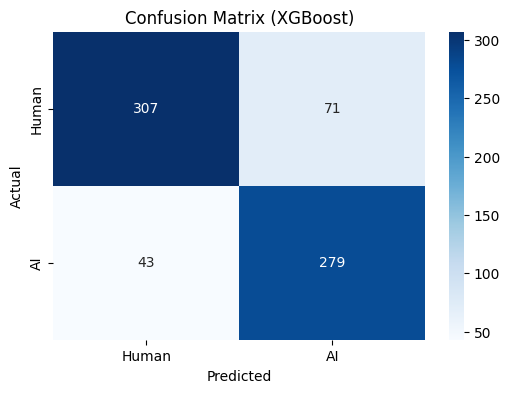

Evaluation of model SVM
ROC AUC Score: 0.8743
              precision    recall  f1-score   support

           0       1.00      0.04      0.07       378
           1       0.47      1.00      0.64       322

    accuracy                           0.48       700
   macro avg       0.73      0.52      0.36       700
weighted avg       0.76      0.48      0.33       700



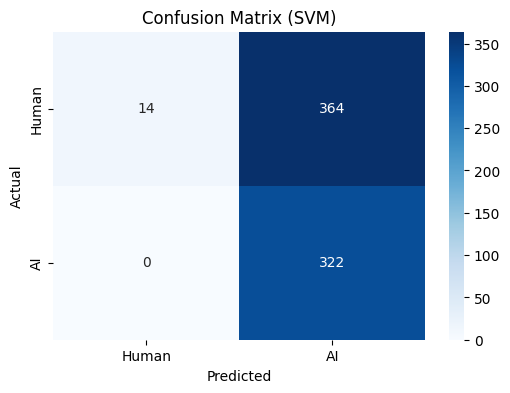

Evaluation of model Random Forest
ROC AUC Score: 0.9405
              precision    recall  f1-score   support

           0       0.65      0.99      0.79       378
           1       0.98      0.37      0.54       322

    accuracy                           0.71       700
   macro avg       0.81      0.68      0.66       700
weighted avg       0.80      0.71      0.67       700



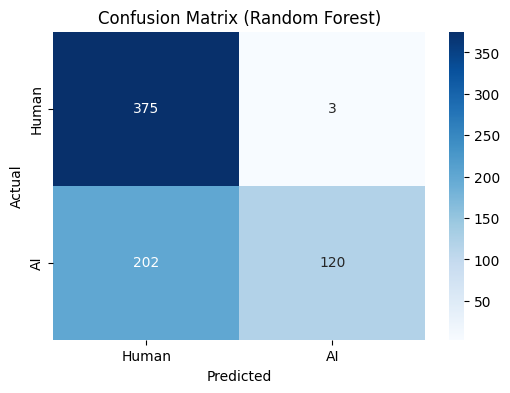

Evaluation of model GradientBoosting
ROC AUC Score: 0.8985
              precision    recall  f1-score   support

           0       0.71      0.97      0.82       378
           1       0.94      0.54      0.68       322

    accuracy                           0.77       700
   macro avg       0.83      0.75      0.75       700
weighted avg       0.82      0.77      0.76       700



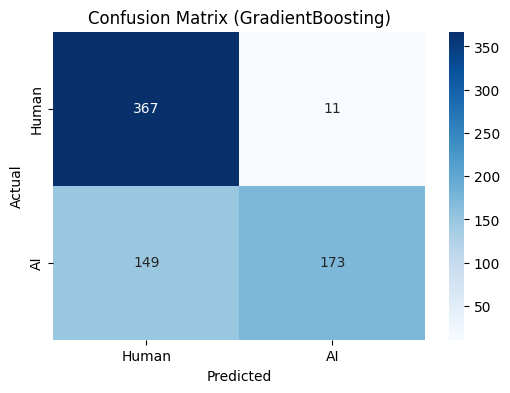

In [12]:
results = []

for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    print(f"Evaluation of model {model_name}")
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    
    
    # Plotting the Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix ({model_name})')
    plt.show()

In [13]:
coling_df = pd.read_csv("/kaggle/input/train-coling/train_COLING.csv").sample(700)

In [14]:
X = coling_df["text"]
y = coling_df["label"]
X_Coling = vectorizer.transform(X)

In [15]:
# df_coling_features = pd.DataFrame()
# df_coling_features = coling_df['text'].apply(extract_features).apply(pd.Series)
# X_Coling = np.hstack((x_vec, df_coling_features))

Evaluation of model XGBoost
ROC AUC Score: 0.6475
              precision    recall  f1-score   support

           0       0.47      0.45      0.46       268
           1       0.67      0.69      0.68       432

    accuracy                           0.60       700
   macro avg       0.57      0.57      0.57       700
weighted avg       0.59      0.60      0.60       700



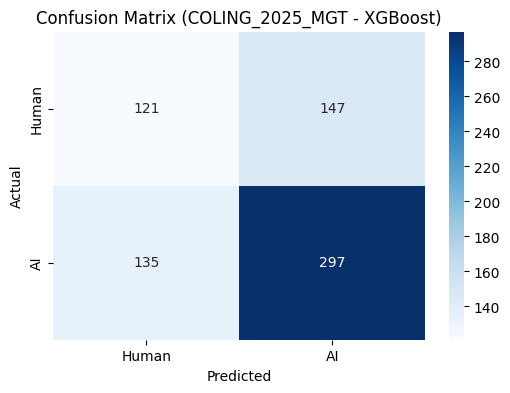

Evaluation of model SVM
ROC AUC Score: 0.5543
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       268
           1       0.61      0.99      0.76       432

    accuracy                           0.61       700
   macro avg       0.31      0.50      0.38       700
weighted avg       0.38      0.61      0.47       700



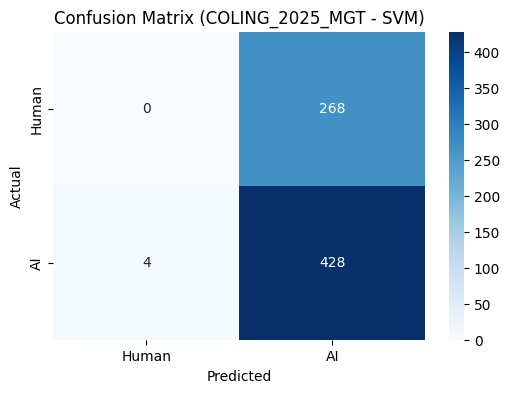

Evaluation of model Random Forest
ROC AUC Score: 0.6695
              precision    recall  f1-score   support

           0       0.41      0.99      0.58       268
           1       0.96      0.12      0.21       432

    accuracy                           0.45       700
   macro avg       0.69      0.56      0.40       700
weighted avg       0.75      0.45      0.35       700



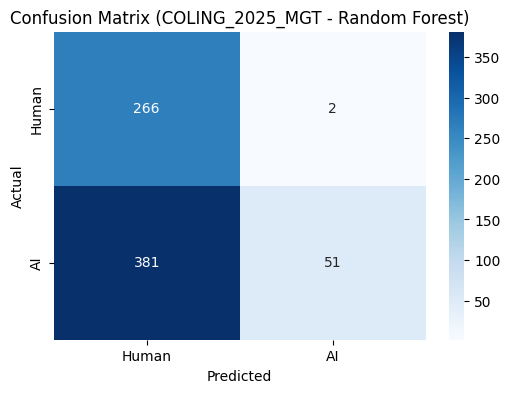

Evaluation of model GradientBoosting
ROC AUC Score: 0.6018
              precision    recall  f1-score   support

           0       0.42      0.94      0.58       268
           1       0.85      0.20      0.32       432

    accuracy                           0.48       700
   macro avg       0.64      0.57      0.45       700
weighted avg       0.69      0.48      0.42       700



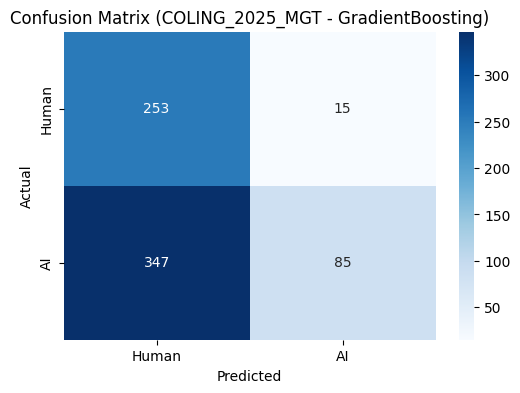

In [16]:
for model_name, model in models.items():
    y_pred = model.predict(X_Coling)
    y_proba = model.predict_proba(X_Coling)[:, 1]
    
    print(f"Evaluation of model {model_name}")
    roc_auc = roc_auc_score(y, y_proba)
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print(classification_report(y, y_pred))
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y, y_pred)

    
    
    # Plotting the Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix (COLING_2025_MGT - {model_name})')
    plt.show()

In [17]:
pan_df = pd.read_csv("/kaggle/input/pan-dataset/train.csv").sample(700)
pan_X = coling_df["text"]
pan_y = coling_df["label"]
X_pan = vectorizer.transform(pan_X)

Evaluation of model XGBoost
              precision    recall  f1-score   support

           0       0.47      0.45      0.46       268
           1       0.67      0.69      0.68       432

    accuracy                           0.60       700
   macro avg       0.57      0.57      0.57       700
weighted avg       0.59      0.60      0.60       700



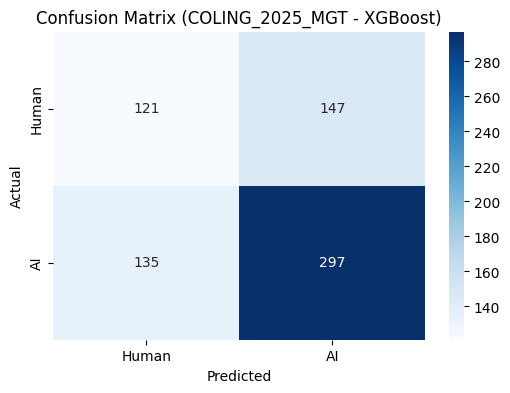

Evaluation of model SVM
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       268
           1       0.61      0.99      0.76       432

    accuracy                           0.61       700
   macro avg       0.31      0.50      0.38       700
weighted avg       0.38      0.61      0.47       700



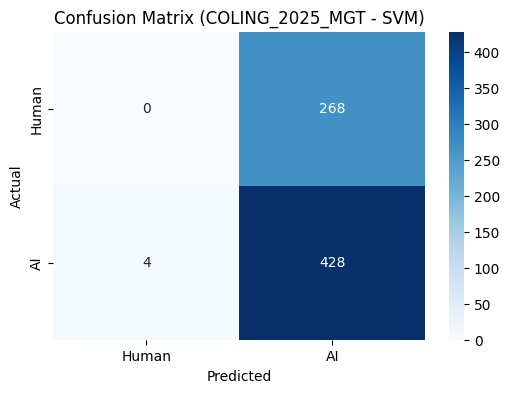

Evaluation of model Random Forest
              precision    recall  f1-score   support

           0       0.41      0.99      0.58       268
           1       0.96      0.12      0.21       432

    accuracy                           0.45       700
   macro avg       0.69      0.56      0.40       700
weighted avg       0.75      0.45      0.35       700



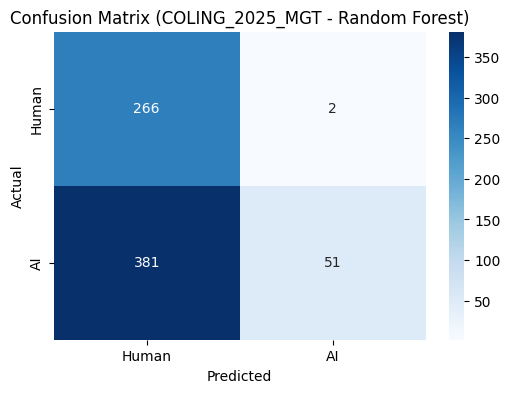

Evaluation of model GradientBoosting
              precision    recall  f1-score   support

           0       0.42      0.94      0.58       268
           1       0.85      0.20      0.32       432

    accuracy                           0.48       700
   macro avg       0.64      0.57      0.45       700
weighted avg       0.69      0.48      0.42       700



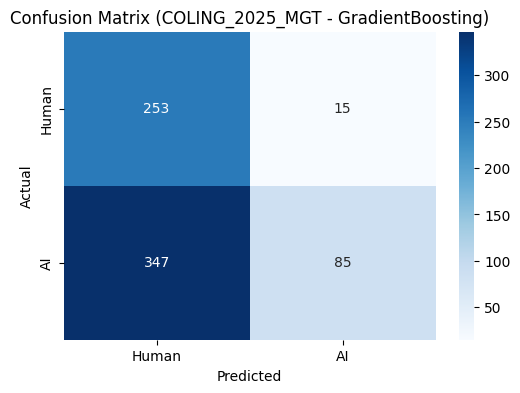

In [18]:
for model_name, model in models.items():
    y_pred = model.predict(X_pan)
    # y_proba = model.predict_proba(X_Coling)[:, 1]
    
    print(f"Evaluation of model {model_name}")
    # roc_auc = roc_auc_score(y, y_proba)
    # print(f"ROC AUC Score: {roc_auc:.4f}")
    print(classification_report(pan_y, y_pred))
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(pan_y, y_pred)
    
    # Plotting the Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix (COLING_2025_MGT - {model_name})')
    plt.show()